## 評価行列、隣接行列、次数行列、ラプラシアン行列

推薦システムのモデル構築でしばしば利用される、評価行列（嗜好行列）、ラプラシアン行列、隣接行列、次数行列についてまとめる。
Pythonのネットワークライブラリ Networkx を利用して、具体的にこれらの行列を計算する。

これらはグラフ理論やグラフスペクトル理論でも頻出する行列で、とても重要な概念である。


### 評価行列、嗜好行列 (Rating Matrix, Preference Matrix)

推薦システムにおける評価行列は、ユーザーとアイテム間の関係を数値で表す重要な要素である。

この行列は行がユーザー、列がアイテムを表し、各要素にはユーザーのアイテムに対する評価が示される。

推薦システムにおける「明示的なフィードバック」と「暗黙的なフィードバック」はユーザーの好みや行動を把握する上で重要である。

明示的なフィードバックはユーザーが直接表明する好みや意見（例: 星の数による評価、レビュー）で、分析が容易だが、ユーザーの積極的な参加が必要でデータに偏りが生じる。

暗黙的なフィードバックはユーザーの行動（例: 閲覧履歴、購入履歴）から推測され、大量のデータ収集が可能だが、解釈に複雑さが伴う。

多くの推薦システムはこれらのフィードバックを組み合わせて使用し、高精度な推薦を実現している。

「明示的なフィードバック」の場合、評価は1から5の数値をとり、「暗黙的なフィードバック」の場合、0か1のバイナリで表されることが多い。以下では、暗黙的なフィードバックのデータを仮定する。

評価行列はしばしば$\mathbf{R}$と書かれ、具体的な行列としては以下のように表現できる。

$$
R_{u, i}=\left\lbrace\begin{array}{lr}
1, & \text { if }(u, i) \text { interaction is observed } \\
0, & \text { otherwise }
\end{array}\right.
$$


$$
\begin{array}{|l|r|r|r|r|}
\hline & \text{ item1 } & \text{ item2 } & \text{ item3 } & \text{ item4 } \\
\hline \text{ user1 } & 0 & 1 & 0 & 0 \\
\hline \text{ user2 } & 0 & 0 & 1 & 1 \\
\hline \text{ user3 } & 1 & 0 & 0 & 0 \\
\hline \text{ user4 } & 0 & 1 & 0 & 0 \\
\hline \text{ user5 } & 1 & 0 & 1 & 0 \\
\hline
\end{array}
$$

$R_{u, i}$はユーザーの各アイテムに対する評価を表す。

### 隣接行列 (Adjacency Matrix : $\mathbf{A}$)

隣接行列は$\left(\mathbf{A}\right)$、グラフ内のノード間の接続関係を表す。

- 定義: グラフの各ノードを行と列に対応させ、ノード間の接続がある場合（エッジが存在する場合）には1を、ない場合には0を配置した行列。
- 特徴: 隣接行列は、グラフのエッジの情報を直接的に表すために使用される。
- 用途: ネットワーク分析、グラフの特性を理解するため、または推薦システムにおけるユーザー間やアイテム間の関連性をモデリングする際に利用される。

推薦システムで利用される$\mathbf{A}$は以下のように定義できる。

$$
\mathbf{A}=\left(\begin{array}{cc}
\mathbf{0} & \mathbf{R} \\
\mathbf{R}^T & \mathbf{0}
\end{array}\right)
$$


### 次数行列 (Degree Matrix)

次数行列は$\left(\mathbf{D}\right)$、グラフ内の各ノードの次数を表す。

- 定義: 対角行列で、各対角要素はグラフの対応するノードの次数を示す。
- 特徴: 非対角要素はすべて0です。対角要素は、そのノードに接続するエッジの数を示す。
- 用途: ラプラシアン行列を構成する際や、ネットワークの特性を分析する際に利用される。


$\mathbf{D}$は以下のように定義できる。$\mathbf{1}$はすべての要素が1のベクトルである。

$$
\mathbf{D}=\text{Diag}\left(\mathbf{A} \cdot \mathbf{1}\right)
$$




### ラプラシアン行列 (Laplacian Matrix)


- 定義: ラプラシアン行列は、次数行列と隣接行列の差で定義される。

$$
\mathbf{L} = \mathbf{D} - \mathbf{A}
$$

- 特徴: ラプラシアン行列の各要素は、対角要素がそのノードの次数であり、非対角要素は、ノード間の接続の有無に基づいて-1または0です（接続がある場合は-1、ない場合は0）。
- 用途: ネットワークの接続性やクラスタリング、スペクトルグラフ理論などに使用されます。

## Pythonを利用して上記の行列を可視化

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/rec/graph/01/01_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/rec/graph/01/01_nb.ipynb)

### 実行環境

In [11]:
!sw_vers

ProductName:		macOS
ProductVersion:		13.5.1
BuildVersion:		22G90


In [12]:
!python -V

Python 3.9.17


基本的なライブラリをインポートしそのバージョンを確認しておきます。
学習をpytorchを利用し、ネットワーク関係はnetworkxを利用する。

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import networkx as nx

print('matplotlib  : {}'.format(matplotlib.__version__))
print('networkx    : {}'.format(nx.__version__))
print('numpy       : {}'.format(np.__version__))

matplotlib  : 3.8.1
networkx    : 3.1
numpy       : 1.25.2


## 二部グラフの作成、L、A、D、正規化行列の計算

以下の評価行列を元に、NetworkXを利用して、隣接行列、次数行列、ラプラシアン行列を作成する。
グラフ構造を可視化する。

レコメンドにおけるグラフは、通常2部グラフとして表現されることに注意する。
すなわち、ユーザーとユーザーの間には何かしらの直接的な関係は観測されない。

$$
\begin{array}{|l|r|r|r|r|}
\hline & \text{ item1 } & \text{ item2 } & \text{ item3 } & \text{ item4 } \\
\hline \text{ user1 } & 0 & 1 & 0 & 0 \\
\hline \text{ user2 } & 0 & 0 & 1 & 1 \\
\hline \text{ user3 } & 1 & 0 & 0 & 0 \\
\hline \text{ user4 } & 0 & 1 & 0 & 0 \\
\hline \text{ user5 } & 1 & 0 & 1 & 0 \\
\hline
\end{array}
$$


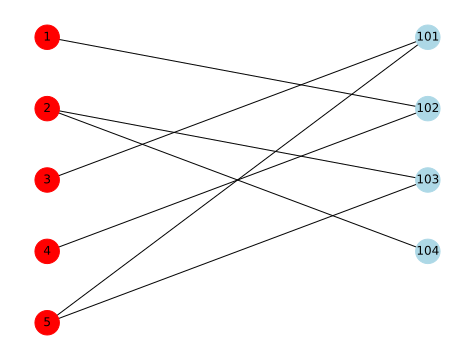

In [14]:
# グラフの定義
# 二部グラフなのでBと表記
B = nx.Graph()

# ユーザー数とアイテム数を定義
user_num = 5
item_num = 4

# ノードの定義
user_node_list = [i + 1 for i in range(user_num)]
item_node_list = [i + 1 for i in range(100, 100 + item_num)]

# 二部グラフとしてノードを定義
B.add_nodes_from(user_node_list, bipartite=0)
B.add_nodes_from(item_node_list, bipartite=1)

node_color = []
node_size = [600 for i in range(user_num + item_num)]

# Nextworkxで表す図の色の定義
for u in user_node_list:
    node_color.append("red")
for i in item_node_list:
    node_color.append("lightblue")

# 図の定義の定義
pos = {}
for _i, u in enumerate(user_node_list):
    pos[u] = np.array([-1, -1.75 * _i])
    for _j, i in enumerate(item_node_list):
        pos[i] = np.array([1, -1.75 * _j])

# 暗黙的なフィードバックで得られたユーザーとアイテムの関係
edge_nodes = [
    (1, 102),
    (2, 103),
    (2, 104),
    (3, 101),
    (4, 102),
    (5, 101),
    (5, 103),
]

B.add_edges_from(edge_nodes)

nx.draw(B, pos=pos, with_labels=True, node_color=node_color, node_size=node_size)

plt.show()

グラフオブジェクトBが定義できると、隣接行列、ラプラシアン行列は NextworkX が計算してくれる。

In [15]:
A = np.array(nx.adjacency_matrix(B).todense())
A

array([[0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
L = np.array(nx.laplacian_matrix(B).todense())
L

array([[ 1,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, -1, -1],
       [ 0,  0,  1,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  2, -1,  0, -1,  0],
       [ 0,  0, -1,  0, -1,  2,  0,  0,  0],
       [-1,  0,  0, -1,  0,  0,  2,  0,  0],
       [ 0, -1,  0,  0, -1,  0,  0,  2,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  1]])

次数行列は$\mathbf{L} + \mathbf{A}$で計算できる。

In [17]:
D = L + A
D

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

また、嗜好行列も隣接行列の一部分をとればよいだけである。

In [18]:
R = A[0:user_num, user_num:]
R

array([[0, 1, 0, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 1, 0]])

## 正規化隣接行列、正規化ラプラシアン行列

グラフ理論を用いた推薦システムのアルゴリズムでは、上記のような隣接行列やラプラシアン行列が直接的に使われる事はなく、正規化された行列が利用される。

正規化隣接行列は以下のように定義される。

$$
\mathbf{\hat{A}}=\text{Diag}\left(\mathbf{A} \cdot \mathbf{1}\right)^{-\frac{1}{2}} \cdot \mathbf{A} \cdot \text{Diag}\left(\mathbf{1}.T \cdot \mathbf{A} \right)^{-\frac{1}{2}}=\mathbf{D}^{-\frac{1}{2}}\mathbf{A}\mathbf{D}^{-\frac{1}{2}}
$$


見た目は複雑だが、numpyを利用すれば計算は簡単である。

In [19]:
A_hat = np.diag(np.power(np.sum(A, axis=1), -1 / 2)) @ A @ np.diag(np.power(np.sum(A, axis=0), -1 / 2))
A_hat.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.71],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.71, 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  ],
       [0.71, 0.  , 0.  , 0.71, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.71, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

正規化ラプラシアン行列は正規化隣接行列を用いて以下のように定義される。

$$
\mathbf{\hat{L}} =\mathbf{D}^{-\frac{1}{2}}\mathbf{L}\mathbf{D}^{-\frac{1}{2}}= \mathbf{I} - \mathbf{\hat{A}} 
$$

正規化ラプラシアン行列もnumpyを利用すれば簡単に計算可能である。

In [20]:
L_hat = np.eye(A_hat.shape[0]) - A_hat
L_hat.round(2)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.71,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.5 , -0.71],
       [ 0.  ,  0.  ,  1.  ,  0.  ,  0.  , -0.71,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  , -0.71,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.5 ,  0.  , -0.5 ,  0.  ],
       [ 0.  ,  0.  , -0.71,  0.  , -0.5 ,  1.  ,  0.  ,  0.  ,  0.  ],
       [-0.71,  0.  ,  0.  , -0.71,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  , -0.5 ,  0.  ,  0.  , -0.5 ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  , -0.71,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

グラフニューラルネットワーク（GNN）やグラフ畳み込みネットワーク（GCN）を利用した推薦システムではこれらの正規化隣接行列や正規化ラプラシアン行列が利用される